# 	Tree-based classification| Random Forests

### Scikit Learn, Python

Import needed libraries

In [1]:
import pandas as pd  #
import numpy as np
import seaborn as sns ## seaborn visualization library
import matplotlib.pyplot as plt
%matplotlib inline
#import math
#import xlrd
import csv
import os, os.path
import statsmodels.api as sm


from statistics import stdev
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV
import sklearn
import sklearn.linear_model as lm
#import sklearn.grid_search as gs
from sklearn.metrics  import classification_report,confusion_matrix
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
import scipy
import scikits.bootstrap as bootstrap  ### pip install scikits.bootstrap
from sklearn.linear_model import Lasso
from sklearn import linear_model, datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

##### Communities and Crime data1 from https://archive.ics.uci. edu/ml/datasets/Communities+and+Crime
##### Training data : First 1495 rows of data 

In [2]:
with open("communities.names") as comm_atr_file:
    comm_file_data =comm_atr_file.readlines()[75:203]
attr = []
i=0
for line in comm_file_data:
    attr.append(line.split(' '))
print(comm_file_data[0])
print(attr[:][:])
print(len(attr))
print(attr[1])

@attribute state numeric

[['@attribute', 'state', 'numeric\n'], ['@attribute', 'county', 'numeric\n'], ['@attribute', 'community', 'numeric\n'], ['@attribute', 'communityname', 'string\n'], ['@attribute', 'fold', 'numeric\n'], ['@attribute', 'population', 'numeric\n'], ['@attribute', 'householdsize', 'numeric\n'], ['@attribute', 'racepctblack', 'numeric\n'], ['@attribute', 'racePctWhite', 'numeric\n'], ['@attribute', 'racePctAsian', 'numeric\n'], ['@attribute', 'racePctHisp', 'numeric\n'], ['@attribute', 'agePct12t21', 'numeric\n'], ['@attribute', 'agePct12t29', 'numeric\n'], ['@attribute', 'agePct16t24', 'numeric\n'], ['@attribute', 'agePct65up', 'numeric\n'], ['@attribute', 'numbUrban', 'numeric\n'], ['@attribute', 'pctUrban', 'numeric\n'], ['@attribute', 'medIncome', 'numeric\n'], ['@attribute', 'pctWWage', 'numeric\n'], ['@attribute', 'pctWFarmSelf', 'numeric\n'], ['@attribute', 'pctWInvInc', 'numeric\n'], ['@attribute', 'pctWSocSec', 'numeric\n'], ['@attribute', 'pctWPubAsst', 'n

In [4]:
i=0
header =[]

for row in attr :
    header.append(row[1])
    
    print(header[i])
    i=i+1
    
        

print(len(header))

state
county
community
communityname
fold
population
householdsize
racepctblack
racePctWhite
racePctAsian
racePctHisp
agePct12t21
agePct12t29
agePct16t24
agePct65up
numbUrban
pctUrban
medIncome
pctWWage
pctWFarmSelf
pctWInvInc
pctWSocSec
pctWPubAsst
pctWRetire
medFamInc
perCapInc
whitePerCap
blackPerCap
indianPerCap
AsianPerCap
OtherPerCap
HispPerCap
NumUnderPov
PctPopUnderPov
PctLess9thGrade
PctNotHSGrad
PctBSorMore
PctUnemployed
PctEmploy
PctEmplManu
PctEmplProfServ
PctOccupManu
PctOccupMgmtProf
MalePctDivorce
MalePctNevMarr
FemalePctDiv
TotalPctDiv
PersPerFam
PctFam2Par
PctKids2Par
PctYoungKids2Par
PctTeen2Par
PctWorkMomYoungKids
PctWorkMom
NumIlleg
PctIlleg
NumImmig
PctImmigRecent
PctImmigRec5
PctImmigRec8
PctImmigRec10
PctRecentImmig
PctRecImmig5
PctRecImmig8
PctRecImmig10
PctSpeakEnglOnly
PctNotSpeakEnglWell
PctLargHouseFam
PctLargHouseOccup
PersPerOccupHous
PersPerOwnOccHous
PersPerRentOccHous
PctPersOwnOccup
PctPersDenseHous
PctHousLess3BR
MedNumBR
HousVacant
PctHousOccup
PctHo

In [5]:
df_main = pd.read_csv('communities.csv',index_col=None,names=header)
len(df_main.columns)
df_main

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
5,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14
6,44,7,41500,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,...,0.05,0.08,0.06,?,?,?,?,0.00,?,0.03
7,6,?,?,Selmacity,1,0.01,0.74,0.03,0.46,0.20,...,0.01,0.33,0.00,?,?,?,?,0.00,?,0.55
8,21,?,?,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,...,0.04,0.17,0.04,?,?,?,?,0.00,?,0.53
9,29,?,?,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,...,0.00,0.47,0.11,?,?,?,?,0.00,?,0.15


In [6]:
df_main.iloc[0]

state                              8
county                             ?
community                          ?
communityname           Lakewoodcity
fold                               1
population                      0.19
householdsize                   0.33
racepctblack                    0.02
racePctWhite                     0.9
racePctAsian                    0.12
racePctHisp                     0.17
agePct12t21                     0.34
agePct12t29                     0.47
agePct16t24                     0.29
agePct65up                      0.32
numbUrban                        0.2
pctUrban                           1
medIncome                       0.37
pctWWage                        0.72
pctWFarmSelf                    0.34
pctWInvInc                       0.6
pctWSocSec                      0.29
pctWPubAsst                     0.15
pctWRetire                      0.43
medFamInc                       0.39
perCapInc                        0.4
whitePerCap                     0.39
b

Above is the main dataframe of communities.data dataset. Several fields are evident to have got the missing values

In [7]:
#df_train_temp.iloc[0]

In [8]:
#df_test_temp.index.values

In [9]:
#df_test_temp = df_test_temp.reset_index(col_level=0)

##### Data imputation technique to deal with the missing values in the data set

df_train = df_train_temp.drop(columns=['state','county','community','communityname','fold'])
df_test = df_test_temp.drop(columns=['state','county','community','communityname','fold'])

In [10]:
#df_train_temp.replace("?",np.nan,inplace=True)
#df_test_temp.replace("?",np.nan,inplace=True)
df_main.replace("?",np.nan,inplace=True)

Representing missing fields:

In [11]:
#df_train.to_excel("train.xlsx")

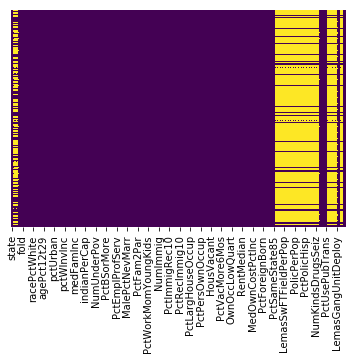

In [12]:
sns.heatmap(df_main.isnull(),yticklabels=False
            ,cbar=False,cmap='viridis')

In [13]:
#header
df_main.columns =header

In [14]:
#df_train_temp[df_train_temp.loc[:,'LemasSwornFT'].notnull()]

In [15]:
#df_temp =df_train_temp.fillna(df_train_temp.mean())
#df_temp
#df_train_temp.fillna(df_train_temp.mean())
#df_train_temp.apply(lambda x: x.fillna(x,mean()),axis=0)


In [16]:
#df_train_temp.isnull().fillna(df_train_temp.mean())


In [17]:
#df_train = df_train_temp.drop(columns=['state','county','community','communityname','fold'])
#df_test = df_test_temp.drop(columns=['state','county','community','communityname','fold'])
df_main = df_main.drop(columns=['state','county','community','communityname','fold'])

In [18]:
#df_train.loc[:,'LemasSwornFT']=df_train.loc[:,'LemasSwornFT'].fillna

In [19]:
#df_train_imputed=pd.DataFrame()
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer = imputer.fit(df_main)
df_main=pd.DataFrame(imputer.transform(df_main))
df_main.columns =header[5:]

In [20]:
df_main

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.01,0.58,0.10,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.14
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0.05,0.08,0.06,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
7,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,...,0.01,0.33,0.00,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.55
8,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,...,0.04,0.17,0.04,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.53
9,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,...,0.00,0.47,0.11,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.15


###### Plot a correlation matrix for the features in the data set.

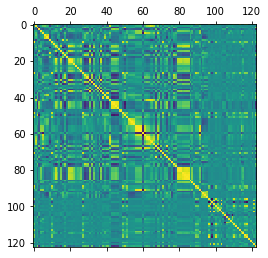

In [21]:
import matplotlib.pyplot as plt
plt.matshow(df_main.corr())

###### Coefficient of Variation CV for each feature, where CV = s/m , in which s is sample variance and m is sample mean.


In [22]:
from scipy.stats import variation
var = variation(df_main, axis=0)
idmax =np.argmax(var)
print(idmax)

90


##### Fit a linear model using least squares to the training set and report the test error.

In [23]:
df_train=pd.DataFrame()
df_test=pd.DataFrame()
df_train = df_main.iloc[:1495,:]
df_test = df_main.iloc[1496:,:]
#df_train = df_main.drop([1495:1992,:])
#df_train.columns =header
#df_test_temp.columns=header
df_test =df_train.reset_index(col_level=1,drop=True)
df_test =df_test.reset_index(col_level=1,drop=True)

In [24]:
df_test

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.01,0.58,0.10,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.14
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0.05,0.08,0.06,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
7,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,...,0.01,0.33,0.00,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.55
8,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,...,0.04,0.17,0.04,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.53
9,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,...,0.00,0.47,0.11,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.15


In [25]:
def linear_regression(X_train,y_train,X_test,y_test) :
    model = sm.OLS(y_train,X_train).fit()
    predictions=model.predict(X_test)
    #pred_1 = lm_1.predict(X_test)
    print(model.summary())
    #print("\n \n Intercept = {}".format(model.intercept_))
    #print("\n coefficients :{}".format(model.coef_))
    
    #plt.scatter(pred_1,y_test,marker='o',edgecolors='black',color='pink')
    #plt.title('ScatterPlot of test data with predictor {} and output' .format(dataframe.columns[i]))
    #plt.xlabel('{}'.format(dataframe.columns[i]),fontsize=12)
    #plt.ylabel('{}'.format(dataframe.columns[len(dataframe.columns)-1]),fontsize=12)
    #plt.plot(pred_1,y_test,color="blue")
    #plt.show()
    return(model.summary())

def linear_regression_stats(X,y) : 
    X = sm.add_constant(X)
    model = sm.OLS(y,X).fit()
    #model = sm.OLS(formual ='PE ~ AT',data=df).fit()
    #pred_2 = model.predict(X_test)
    print("\n \033[1m  ")
    print("Simple Linear regression model stats ")
    print("\033[0m \n   " )
    print(model.summary())
    coeff_uni= []
    coeff_uni.append(np.array(model.params))
    print("\n \033[1m  ")
    print("coefficients of univariate linear regression " .format(coeff_uni))
    print("\033[0m \n   " )

In [26]:
# fitting linear model using
coeff_uni = []
X_train_linear = df_train.drop(['ViolentCrimesPerPop'],axis=1)
y_train_linear = df_train.iloc[:,-1]
X_test_linear = df_test.drop(['ViolentCrimesPerPop'],axis=1)
y_test_linear = df_train.iloc[:,-1]
#for i in range(0,len(df_train.columns)-1,1):
#X_train_linear = pd.DataFrame(df_train.iloc[:,i].values.reshape(-1,1))
#y_train_linear = pd.DataFrame(df_train.iloc[:,-1].values.reshape(-1,1))
#X_test_linear = pd.DataFrame(df_test.iloc[:,i].values.reshape(-1,1))
#y_test_linear = pd.DataFrame(df_test.iloc[:,-1].values.reshape(-1,1))
print(X_train_linear.shape)
coeff_uni.append(linear_regression(X_train_linear,y_train_linear,X_test_linear,y_test_linear))### function call
#linear_regression_stats(X_1,y_1)


(1495, 122)
                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.858
Model:                             OLS   Adj. R-squared:                  0.845
Method:                  Least Squares   F-statistic:                     67.83
Date:                 Fri, 08 Mar 2019   Prob (F-statistic):               0.00
Time:                         20:41:41   Log-Likelihood:                 957.08
No. Observations:                 1495   AIC:                            -1670.
Df Residuals:                     1373   BIC:                            -1022.
Df Model:                          122                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
populati

In [27]:
#coeff_uni_train

##### Ridge regression model on the training set, with λ chosen by cross-validation

In [46]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [29]:
X_train_ridge = df_train.drop(['ViolentCrimesPerPop'],axis=1)
y_train_ridge = df_train.iloc[:,-1]
X_test_ridge = df_test.drop(['ViolentCrimesPerPop'],axis=1)
y_test_ridge = df_train.iloc[:,-1]

In [30]:
alphas = 10**np.linspace(6,-2,50)*0.5
lasso = Lasso(max_iter=10000, normalize=True)

In [31]:
ridgecv = RidgeCV(alphas=alphas, normalize=True)
ridgecv.fit(X_train_ridge, y_train_ridge)
print("Alpha=", ridgecv.alpha_)
ridge6 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge6.fit(X_test_ridge, y_test_ridge)
print("mse = ",mean_squared_error(y_test_ridge, ridge6.predict(X_test_ridge)))
print("best model coefficients:")
pd.DataFrame(ridge6.coef_, index=df_main.columns.drop(['ViolentCrimesPerPop']))

Alpha= 0.04770477381749972
mse =  0.016976327781414426
best model coefficients:


,0
population,-0.029681
householdsize,0.014665
racepctblack,0.190708
racePctWhite,-0.069807
racePctAsian,-0.033969
racePctHisp,-0.007755
agePct12t21,0.043972
agePct12t29,-0.171291
agePct16t24,-0.025257
agePct65up,0.047599


In [32]:
pd.DataFrame(ridge6.coef_)


,0
0,-0.029681
1,0.014665
2,0.190708
3,-0.069807
4,-0.033969
5,-0.007755
6,0.043972
7,-0.171291
8,-0.025257
9,0.047599


##### LASSO model on the training set, with λ chosen by cross-validation

In [33]:
X_train_lasso = df_train.drop(['ViolentCrimesPerPop'],axis=1)
y_train_lasso = df_train.iloc[:,-1]
X_test_lasso = df_test.drop(['ViolentCrimesPerPop'],axis=1)
y_test_lasso = df_train.iloc[:,-1]

In [34]:
alphas = 10**np.linspace(6,-2,50)*0.5
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_lasso, y_train_lasso)
    coefs.append(lasso.coef_)
    
np.shape(coefs)

(50, 122)

In [35]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train_lasso, y_train_lasso)
lasso.set_params(alpha=lassocv.alpha_)
print("Alpha=", lassocv.alpha_)
lasso.fit(X_train_lasso, y_train_lasso)
print("mse = ",mean_squared_error(y_test_lasso, lasso.predict(X_test_lasso)))
print("best model coefficients:")
pd.Series(lasso.coef_, index=df_main.columns.drop(['ViolentCrimesPerPop']))

Alpha= 1.840553189634884e-05
mse =  0.016993224111507374
best model coefficients:


population             -0.000000
householdsize           0.000000
racepctblack            0.267046
racePctWhite           -0.000000
racePctAsian           -0.006416
racePctHisp            -0.000000
agePct12t21             0.072089
agePct12t29            -0.280218
agePct16t24             0.000000
agePct65up              0.000000
numbUrban              -0.000000
pctUrban                0.037704
medIncome               0.000000
pctWWage               -0.071360
pctWFarmSelf            0.021428
pctWInvInc             -0.116960
pctWSocSec              0.054849
pctWPubAsst             0.029348
pctWRetire             -0.105991
medFamInc               0.000000
perCapInc              -0.000000
whitePerCap            -0.049459
blackPerCap            -0.021506
indianPerCap           -0.031885
AsianPerCap             0.026856
OtherPerCap             0.020548
HispPerCap              0.022455
NumUnderPov            -0.000000
PctPopUnderPov         -0.120353
PctLess9thGrade        -0.011477
          

Text(0, 0.5, 'weights')

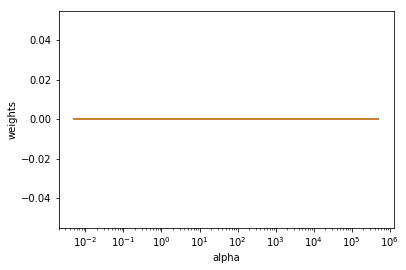

In [36]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

standardized and fit into lassocv

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_lasso)
X_train_lasso_stand = scaler.transform(X_train_lasso)
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000)
lassocv.fit(X_train_lasso_stand, y_train_lasso)
lasso.set_params(alpha=lassocv.alpha_)
print("Alpha=", lassocv.alpha_)
lasso.fit(X_train_lasso, y_train_lasso)
print("mse = ",mean_squared_error(y_test_lasso, lasso.predict(X_test_lasso)))
print("best model coefficients:")
pd.Series(lasso.coef_, index=df_main.columns.drop(['ViolentCrimesPerPop']))

Alpha= 0.0006636910154760816
mse =  0.021415457232209504
best model coefficients:


population              0.00000
householdsize          -0.00000
racepctblack            0.00000
racePctWhite           -0.18042
racePctAsian            0.00000
racePctHisp             0.00000
agePct12t21            -0.00000
agePct12t29            -0.00000
agePct16t24            -0.00000
agePct65up              0.00000
numbUrban               0.00000
pctUrban                0.00000
medIncome              -0.00000
pctWWage               -0.00000
pctWFarmSelf           -0.00000
pctWInvInc             -0.00000
pctWSocSec              0.00000
pctWPubAsst             0.00000
pctWRetire             -0.00000
medFamInc              -0.00000
perCapInc              -0.00000
whitePerCap             0.00000
blackPerCap            -0.00000
indianPerCap           -0.00000
AsianPerCap             0.00000
OtherPerCap             0.00000
HispPerCap             -0.00000
NumUnderPov             0.00000
PctPopUnderPov          0.00000
PctLess9thGrade         0.00000
                         ...   
PctBornS

##### PCR model on the training set, with M (the number of principal components) chosen by cross-validation

In [38]:
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA

In [39]:
X_train_pcr = df_train.drop(['ViolentCrimesPerPop'],axis=1)
y_train_pcr = df_train.iloc[:,-1]
X_test_pcr = df_test.drop(['ViolentCrimesPerPop'],axis=1)
y_test_pcr = df_train.iloc[:,-1]

In [40]:
#pca = PCA(n_components=2)
#pca.fit()
alphas = 10**np.linspace(6,-2,50)*0.5
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_pcr, y_train_pcr)
    coefs.append(lasso.coef_)
    
np.shape(coefs)




lassocv = LassoCV(alphas=None, cv=10, max_iter=100000)
lassocv.fit(X_train_pcr, y_train_pcr)
lasso.set_params(alpha=lassocv.alpha_)
print("Alpha=", lassocv.alpha_)
lasso.fit(X_train_pcr, y_train_pcr)
print("mse = ",mean_squared_error(y_test_pcr, lasso.predict(X_test_pcr)))
print("best model coefficients:")
pd.Series(lasso.coef_, index=df_main.columns.drop(['ViolentCrimesPerPop']))

Alpha= 0.00010831930127505126
mse =  0.01845046511438036
best model coefficients:


population              0.000000
householdsize          -0.000000
racepctblack            0.201427
racePctWhite           -0.016512
racePctAsian            0.000000
racePctHisp             0.000000
agePct12t21            -0.000000
agePct12t29            -0.062184
agePct16t24            -0.000000
agePct65up              0.000000
numbUrban               0.000000
pctUrban                0.031501
medIncome               0.000000
pctWWage               -0.000000
pctWFarmSelf            0.000000
pctWInvInc             -0.013689
pctWSocSec              0.000000
pctWPubAsst             0.004511
pctWRetire             -0.030568
medFamInc               0.000000
perCapInc               0.000000
whitePerCap             0.000000
blackPerCap            -0.000000
indianPerCap           -0.000004
AsianPerCap             0.010147
OtherPerCap             0.000000
HispPerCap              0.000000
NumUnderPov             0.000000
PctPopUnderPov         -0.000000
PctLess9thGrade        -0.000000
          

In [41]:
pca = PCA()
X_reduced= pca.fit_transform(scale(df_main))

In [42]:
pd.DataFrame(pca.components_.T).loc[:4,:5]

,0,1,2,3,4,5
0,0.062779,0.103296,0.193844,0.061009,0.083051,-0.142043
1,-0.006707,0.106158,-0.170311,0.101187,0.178406,0.080939
2,0.108996,0.004031,0.064715,-0.021772,-0.029267,0.039438
3,-0.119924,-0.109073,0.013918,-0.005438,0.036377,-0.022301
4,-0.040205,0.165828,-0.011569,-0.051465,-0.047748,-0.045914


In [47]:
# 10-fold CV, with shuffle
n = len(X_reduced)
print(n)
kf_10 = sklearn.model_selection.KFold( n_splits=10, shuffle=True, random_state=101)
print(kf_10)

1994
KFold(n_splits=10, random_state=101, shuffle=True)


In [50]:
regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*sklearn.model_selection.cross_val_score(regr,X_train_pcr,y_train_pcr,cv=3, scoring='neg_mean_squared_error').mean()    
print(sklearn.model_selection.cross_val_score(regr,X_train_pcr,y_train_pcr,cv=3))
print(score)
mse.append(score)
print(mse)

[0.59749058 0.63887551 0.64196323]
0.02112766437230443
[0.02112766437230443]


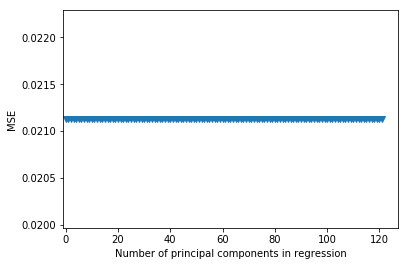

In [51]:
mse1 = []
# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 123):
    score1 = -1*sklearn.model_selection.cross_val_score(regr,X_train_pcr,y_train_pcr,cv=3, scoring='neg_mean_squared_error').mean()
    mse1.append(score1)
    
# Plot results    
plt.plot(mse1, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
#plt.title('Salary')
plt.xlim(xmin=-1);

In [ ]:
pca2=PCA()
X_reduced_train = pca2.fit_transform(scale(X_train_pcr))
n = len(X_reduced_train)


In [52]:
kf_2 = sklearn.model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

In [54]:
mse2 = []

In [56]:
score2 = -1*sklearn.model_selection.cross_val_score(regr,X_train_pcr,y_train_pcr,cv=3, scoring='neg_mean_squared_error').mean()
mse2.append(score2)
print(mse2)

[0.02112766437230443, 0.02112766437230443]


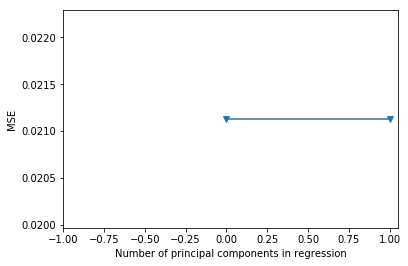

In [57]:
for i in np.arange(1, 122):
    score3 = -1*sklearn.model_selection.cross_val_score(regr,X_train_pcr,y_train_pcr,cv=3, scoring='neg_mean_squared_error').mean()
    mse.append(score3)
plt.plot(np.array(mse2), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
#plt.title('Salary')
plt.xlim(xmin=-1);

###  Tree-Based Methods
###### Data : Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [58]:
df_aps_train = pd.read_csv('aps_failure_training_set.csv',skiprows=19)
df_aps_test = pd.read_csv('aps_failure_test_set.csv',skiprows=19)

In [59]:
header_train = []
header_train = df_aps_train.columns
class_train = []
class_train = df_aps_train.loc[:,'class']
class_test = []
class_test = df_aps_test.loc[:,'class']
header_test = []
header_test = df_aps_train.columns

In [60]:
df_aps_train.replace("na",np.nan,inplace=True)
df_aps_test.replace("na",np.nan,inplace=True)

In [61]:
df_aps_train.loc[df_aps_train['class'] == "neg", 'class'] = 1
df_aps_train.loc[df_aps_train['class'] == "pos", 'class'] = 1
df_aps_test.loc[df_aps_test['class'] == "neg", 'class'] = 1
df_aps_test.loc[df_aps_test['class'] == "pos", 'class'] = 1

In [62]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer = imputer.fit(df_aps_train)
df_aps_train=pd.DataFrame(imputer.transform(df_aps_train))
df_aps_train.columns =header_train[:]
df_aps_test=pd.DataFrame(imputer.transform(df_aps_test))
df_aps_test.columns =header_test[:]

In [63]:
df_aps_train.loc[:,'class']=class_train
df_aps_test.loc[:,'class']=class_test
df_aps_train.loc[df_aps_train['class'] == "neg", 'class'] = 1
df_aps_train.loc[df_aps_train['class'] == "pos", 'class'] = 1
df_aps_test.loc[df_aps_test['class'] == "neg", 'class'] = 1
df_aps_test.loc[df_aps_test['class'] == "pos", 'class'] = 1

In [64]:
df_aps_train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,1,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,1,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,1,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,1,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,1,38312.0,0.713189,2.130706e+09,218.000000,0.0,0.0,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0
6,1,14.0,0.000000,6.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,102960.0,0.713189,2.130706e+09,116.000000,0.0,0.0,0.0,0.0,0.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0
8,1,78696.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0
9,1,153204.0,0.000000,1.820000e+02,190620.639314,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0


In [65]:

df_x_train=df_aps_train.drop('class',axis=1)
df_y_train=df_aps_train['class']

df_x_test=df_aps_test.drop('class',axis=1)
df_y_test=df_aps_test['class']

In [66]:
#df_X_aps = pd.concat([df_x_train,df_x_test],axis=1,sort=False)
#df_y_aps = pd.concat([df_x_train,df_x_test],axis=1,sort=False)
df_X_aps = pd.DataFrame(df_x_train.append(df_x_test))
df_y_aps = pd.DataFrame(df_y_train.append(df_y_test))

In [67]:
df_X_aps.columns

Index(['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000',
       'ag_001', 'ag_002', 'ag_003',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=170)

In [68]:
df_y_aps.columns

Index(['class'], dtype='object')

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

In [71]:
rf.fit(df_x_train, df_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [76]:
predictions = rf.predict(df_x_test)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [77]:
rf_cv_score = cross_val_score(rf, df_X_aps, df_y_aps, cv=10)

In [78]:
print("=== Confusion Matrix ===")
print(confusion_matrix(df_y_test, predictions))
print("\n")
print("=== Classification Report ===")
print(classification_report(df_y_test, predictions))
print("\n")
print("=== All AUC Scores ===")
print(rf_cv_score)
print("\n")
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rf_cv_score.mean())

=== Confusion Matrix ===
[[16000]]


=== Classification Report ===
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     16000

   micro avg       1.00      1.00      1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000



=== All AUC Scores ===
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  1.0


##### Compensating class imbalance for random forests

In [ ]:

df_x_train_bal=df_aps_train.drop('class',axis=1)
df_y_train_bal=df_aps_train['class']

df_x_test_bal=df_aps_test.drop('class',axis=1)
df_y_test_bal=df_aps_test['class']

In [ ]:
#df_X_aps = pd.concat([df_x_train,df_x_test],axis=1,sort=False)
#df_y_aps = pd.concat([df_x_train,df_x_test],axis=1,sort=False)
df_X_bal = pd.DataFrame(df_x_train.append(df_x_test_bal))
df_y_bal = pd.DataFrame(df_y_train.append(df_y_test_bal))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_bal = RandomForestClassifier(n_estimators = 1000, random_state = 42,class_weight="balanced")

In [ ]:
rf_bal.fit(df_x_train_bal, df_y_train_bal)

In [178]:
predictions_bal = rf.predict(df_x_test_bal)
predictions

array([1., 1., 1., ..., 1., 1., 1.])

In [179]:
rf_cv_score = cross_val_score(rf, df_X_bal, df_y_bal, cv=10)

In [180]:
print("=== Confusion Matrix ===")
print(confusion_matrix(df_y_test_bal, predictions_bal))
print("\n")
print("=== Classification Report ===")
print(classification_report(df_y_test_bal, predictions_bal))
print("\n")
print("=== All AUC Scores ===")
print(rf_cv_score)
print("\n")
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rf_cv_score.mean())

=== Confusion Matrix ===
[[16000]]


=== Classification Report ===
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     16000

   micro avg       1.00      1.00      1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000



=== All AUC Scores ===
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  1.0


##### Model Trees
##### In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has Pj βjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node. One of the methods that can be used at each node is Logistic Regression. One can use scikit learn to call Weka7 to train Logistic Model Trees for classification. Train Logistic Model Trees for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets

In [186]:
import weka.core.jvm as jvm
jvm.stop()

#####  SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.

In [82]:
df_x_train_smote=df_aps_train.drop('class',axis=1)
df_y_train_smote=df_aps_train['class']

df_x_test_smote=df_aps_test.drop('class',axis=1)
df_y_test_smote=df_aps_test['class']
#df_X_aps = pd.concat([df_x_train,df_x_test],axis=1,sort=False)
#df_y_aps = pd.concat([df_x_train,df_x_test],axis=1,sort=False)
df_X_smote = pd.DataFrame(df_x_train.append(df_x_test_smote))
df_y_smote = pd.DataFrame(df_y_train.append(df_y_test_smote))

In [83]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(df_x_train_smote, df_y_train_smote)

print(X_ros.shape[0] - df_x_train_smote.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

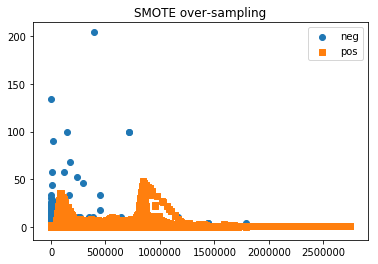

In [217]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(df_x_train_smote, df_y_train_smote)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

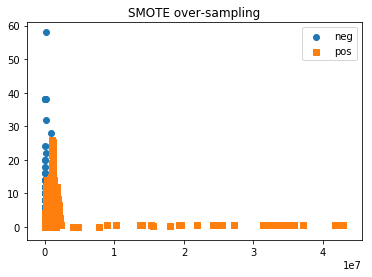

In [219]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(df_x_test_smote, df_y_test_smote)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

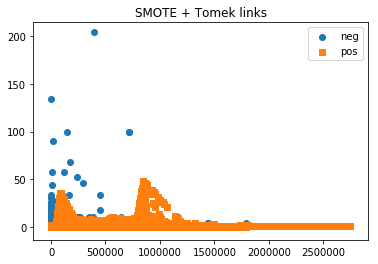

In [221]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(df_x_train_smote, df_y_train_smote)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

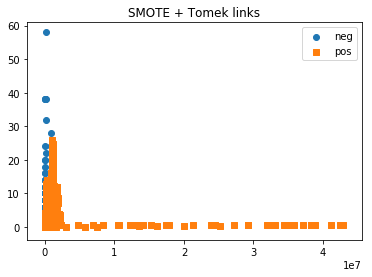

In [222]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(df_x_test_smote, df_y_test_smote)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')
